In [193]:
import pandas as pd
import requests
import json
import time
import math
import matplotlib.pyplot as plt
import scipy.stats as st
from config import gkey
from pprint import pprint

In [194]:
#importing csv
SAT_file ='Docs\SAT Data.csv'

In [195]:
SAT_df = pd.read_csv(SAT_file)
print(f"number of records:{len(SAT_df)}")
SAT_df.head(15)

number of records:6806


,School,Online only?,School size (students),2yr/4yr,sat_scores.25th_percentile.critical_reading,sat_scores.midpoint.critical_reading,sat_scores.75th_percentile.critical_reading,sat_scores.25th_percentile.math,sat_scores.midpoint.math,sat_scores.75th_percentile.math,Tuition (in state),Tuition (out of state),Tuition (program year)
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0,NaN
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0,NaN
2,Illinois College,0.0,971.0,1,NaN,NaN,NaN,NaN,NaN,NaN,33090.0,33090.0,NaN
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0,NaN
4,Olney Central College,0.0,721.0,2,NaN,NaN,NaN,NaN,NaN,NaN,3970.0,11734.0,NaN
5,Morton College,0.0,3384.0,2,NaN,NaN,NaN,NaN,NaN,NaN,4372.0,10516.0,NaN
6,Illinois Valley Community College,0.0,2135.0,2,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,11782.0,NaN
7,Lincoln Christian University,0.0,398.0,1,490.0,555.0,620.0,450.0,505.0,560.0,13200.0,13200.0,NaN
8,Northern Baptist Theological Seminary,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Holy Cross College,0.0,498.0,1,560.0,625.0,690.0,540.0,625.0,710.0,30700.0,30700.0,NaN


In [196]:
#reading just the column names
SAT_df.columns

Index(['School', 'Online only?', 'School size (students)', '2yr/4yr',
       'sat_scores.25th_percentile.critical_reading',
       'sat_scores.midpoint.critical_reading',
       'sat_scores.75th_percentile.critical_reading',
       'sat_scores.25th_percentile.math', 'sat_scores.midpoint.math',
       'sat_scores.75th_percentile.math', 'Tuition (in state)',
       'Tuition (out of state)', 'Tuition (program year)'],
      dtype='object')

In [197]:
#renaming the column names
SAT_df_1=SAT_df.rename(columns={"sat_scores.25th_percentile.critical_reading":"SAT25%Cri_Rea", "sat_scores.midpoint.critical_reading":"SAT50%Cri_Rea","sat_scores.75th_percentile.critical_reading":"SAT75%Cri_Rea","sat_scores.25th_percentile.math":"SAT25%Cri_MAT","sat_scores.midpoint.math":"SAT50%Cri_MAT","sat_scores.75th_percentile.math":"SAT75%Cri_MAT"}) 
SAT_df_1.head()

,School,Online only?,School size (students),2yr/4yr,SAT25%Cri_Rea,SAT50%Cri_Rea,SAT75%Cri_Rea,SAT25%Cri_MAT,SAT50%Cri_MAT,SAT75%Cri_MAT,Tuition (in state),Tuition (out of state),Tuition (program year)
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0,NaN
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0,NaN
2,Illinois College,0.0,971.0,1,NaN,NaN,NaN,NaN,NaN,NaN,33090.0,33090.0,NaN
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0,NaN
4,Olney Central College,0.0,721.0,2,NaN,NaN,NaN,NaN,NaN,NaN,3970.0,11734.0,NaN


In [198]:
#Applying FILTERS on 
#1) University's having grater than 100 students
#2) University's offering inperson classes-(excludes online only University's)
#3) University's that offer 4 year cources
final_cl_df = SAT_df_1.loc[(SAT_df_1['School size (students)']>100) & 
                           (SAT_df_1['Online only?']==0) & (SAT_df_1['2yr/4yr'])==1] 
                           #& 
                           #(SAT_df_1['Tuition (program year)']>0)] 
final_cl_df.dropna
final_cl_df.head()
print(f"number of records:{len(final_cl_df)}")

number of records:3081


In [199]:
final_cl_df.head(400)


,School,Online only?,School size (students),2yr/4yr,SAT25%Cri_Rea,SAT50%Cri_Rea,SAT75%Cri_Rea,SAT25%Cri_MAT,SAT50%Cri_MAT,SAT75%Cri_MAT,Tuition (in state),Tuition (out of state),Tuition (program year)
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0,NaN
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0,NaN
2,Illinois College,0.0,971.0,1,NaN,NaN,NaN,NaN,NaN,NaN,33090.0,33090.0,NaN
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0,NaN
7,Lincoln Christian University,0.0,398.0,1,490.0,555.0,620.0,450.0,505.0,560.0,13200.0,13200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,University of Southern Maine,0.0,5281.0,1,480.0,535.0,590.0,460.0,510.0,560.0,8918.0,21294.0,NaN
761,Frostburg State University,0.0,4359.0,1,470.0,515.0,560.0,460.0,505.0,550.0,9172.0,22892.0,NaN
763,Goucher College,0.0,1523.0,1,NaN,NaN,NaN,NaN,NaN,NaN,44300.0,44300.0,NaN
764,Purdue University Global-Hagerstown,0.0,409.0,1,NaN,NaN,NaN,NaN,NaN,NaN,14343.0,14343.0,NaN


In [200]:
del final_cl_df['Tuition (program year)']

final_cl_df


,School,Online only?,School size (students),2yr/4yr,SAT25%Cri_Rea,SAT50%Cri_Rea,SAT75%Cri_Rea,SAT25%Cri_MAT,SAT50%Cri_MAT,SAT75%Cri_MAT,Tuition (in state),Tuition (out of state)
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0
2,Illinois College,0.0,971.0,1,NaN,NaN,NaN,NaN,NaN,NaN,33090.0,33090.0
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0
7,Lincoln Christian University,0.0,398.0,1,490.0,555.0,620.0,450.0,505.0,560.0,13200.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6796,Ocean County Vocational-Technical School,0.0,369.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6797,University of Alabama at Birmingham,0.0,13186.0,1,490.0,555.0,620.0,490.0,555.0,620.0,8568.0,19704.0
6798,University of Montevallo,0.0,2251.0,1,NaN,NaN,NaN,NaN,NaN,NaN,12760.0,25780.0
6802,University of Alaska Anchorage,0.0,10482.0,1,NaN,NaN,NaN,NaN,NaN,NaN,8580.0,24762.0


In [201]:
final_cl_df_1 = final_cl_df.dropna(axis=0,how='any')

In [202]:
print(f"number of records:{len(final_cl_df_1)}")


number of records:1212


In [203]:

final_cl_df_1


,School,Online only?,School size (students),2yr/4yr,SAT25%Cri_Rea,SAT50%Cri_Rea,SAT75%Cri_Rea,SAT25%Cri_MAT,SAT50%Cri_MAT,SAT75%Cri_MAT,Tuition (in state),Tuition (out of state)
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0
7,Lincoln Christian University,0.0,398.0,1,490.0,555.0,620.0,450.0,505.0,560.0,13200.0,13200.0
9,Holy Cross College,0.0,498.0,1,560.0,625.0,690.0,540.0,625.0,710.0,30700.0,30700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6782,University of North Alabama,0.0,5741.0,1,510.0,560.0,610.0,500.0,540.0,580.0,10142.0,18452.0
6785,Jacksonville State University,0.0,6394.0,1,440.0,445.0,450.0,470.0,475.0,480.0,8760.0,16536.0
6786,Samford University,0.0,3524.0,1,552.0,601.0,650.0,520.0,570.0,620.0,31650.0,31650.0
6797,University of Alabama at Birmingham,0.0,13186.0,1,490.0,555.0,620.0,490.0,555.0,620.0,8568.0,19704.0


In [204]:
#create new column total and adding it to the Df
final_cl_df_1['Total_SAT'] = final_cl_df_1['SAT50%Cri_MAT']+final_cl_df_1['SAT50%Cri_Rea']
final_cl_df_1


<ipython-input-204-7e671d8ebf14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cl_df_1['Total_SAT'] = final_cl_df_1['SAT50%Cri_MAT']+final_cl_df_1['SAT50%Cri_Rea']


,School,Online only?,School size (students),2yr/4yr,SAT25%Cri_Rea,SAT50%Cri_Rea,SAT75%Cri_Rea,SAT25%Cri_MAT,SAT50%Cri_MAT,SAT75%Cri_MAT,Tuition (in state),Tuition (out of state),Total_SAT
0,Millikin University,0.0,1918.0,1,490.0,555.0,620.0,470.0,530.0,590.0,35002.0,35002.0,1085.0
1,Monmouth College,0.0,901.0,1,500.0,540.0,580.0,480.0,535.0,590.0,37674.0,37674.0,1075.0
3,Quincy University,0.0,916.0,1,490.0,535.0,580.0,470.0,515.0,560.0,28562.0,28562.0,1050.0
7,Lincoln Christian University,0.0,398.0,1,490.0,555.0,620.0,450.0,505.0,560.0,13200.0,13200.0,1060.0
9,Holy Cross College,0.0,498.0,1,560.0,625.0,690.0,540.0,625.0,710.0,30700.0,30700.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,University of North Alabama,0.0,5741.0,1,510.0,560.0,610.0,500.0,540.0,580.0,10142.0,18452.0,1100.0
6785,Jacksonville State University,0.0,6394.0,1,440.0,445.0,450.0,470.0,475.0,480.0,8760.0,16536.0,920.0
6786,Samford University,0.0,3524.0,1,552.0,601.0,650.0,520.0,570.0,620.0,31650.0,31650.0,1171.0
6797,University of Alabama at Birmingham,0.0,13186.0,1,490.0,555.0,620.0,490.0,555.0,620.0,8568.0,19704.0,1110.0


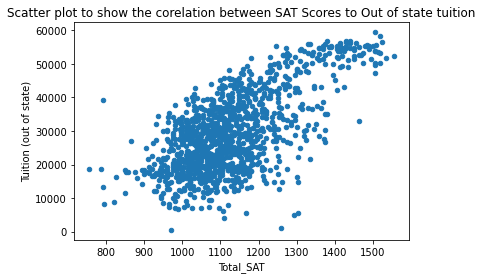

In [205]:
#Plotting scatter using Pandas
final_cl_df_1.plot.scatter(x='Total_SAT', y='Tuition (out of state)', title= "Scatter plot to show the corelation between SAT Scores to Out of state tuition");

#plot.show(block=True);

The correlation between both factors is 0.67


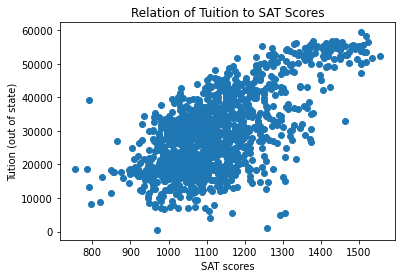

In [206]:
#Plotting scatter using Matplotlib
SAT = final_cl_df_1.iloc[:,12]
Tuition_ou = final_cl_df_1.iloc[:,11]
correlation = st.pearsonr(SAT,Tuition_ou)
plt.scatter(SAT,Tuition_ou)
plt.title('Relation of Tuition to SAT Scores')
plt.xlabel('SAT scores')
plt.ylabel('Tution (out of state)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.48


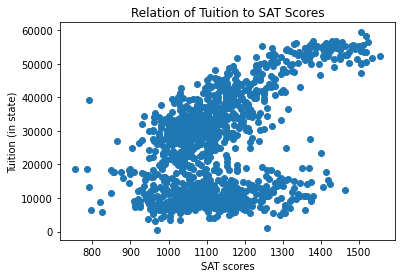

In [207]:
#Plotting scatter using Matplotlib
SAT = final_cl_df_1.iloc[:,12]
Tuition_in = final_cl_df_1.iloc[:,10]
correlation = st.pearsonr(SAT,Tuition_in)
plt.scatter(SAT,Tuition_in)
plt.title('Relation of Tuition to SAT Scores')
plt.xlabel('SAT scores')
plt.ylabel('Tuition (in state)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.67


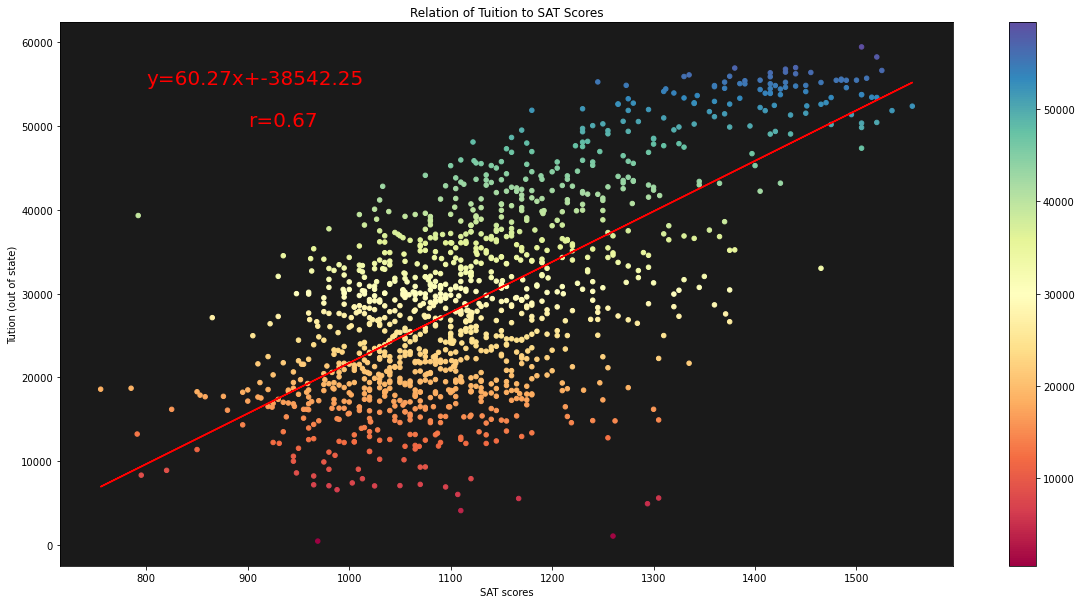

In [213]:
#Plotting scatter using Matplotlib
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111, facecolor='.1')
SAT = final_cl_df_1.iloc[:,12]
Tuition_ou = final_cl_df_1.iloc[:,11]
correlation = st.pearsonr(SAT,Tuition_ou)
plt.scatter(SAT,Tuition_ou,c=final_cl_df_1['Tuition (out of state)'],cmap='Spectral',alpha=1,s=20)
plt.colorbar()
plt.title('Relation of Tuition to SAT Scores')
plt.xlabel('SAT scores')
plt.ylabel('Tution (out of state)')
print(f"The correlation between both factors is {round(correlation[0],2)}")


#REGRESSION line code
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(SAT, Tuition_ou)
regress_values = SAT * slope + intercept
plt.plot(SAT,regress_values,c="r")

#Equation code
EQ=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.annotate(EQ,(800,55000),size=20,c='r')
plt.annotate(f'r={round(rvalue,2)}',(900,50000),size=20,c='r')

plt.savefig("Figures/Fig 1 - SAT vs Tuition_ou")
plt.show()






The correlation between both factors is 0.48


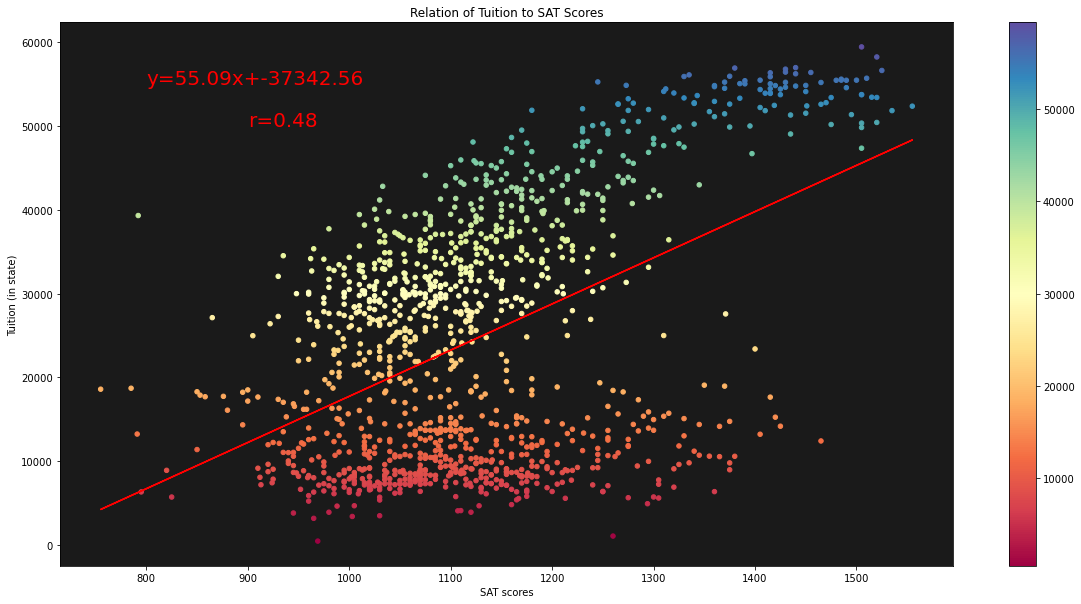

In [214]:
#Plotting scatter using Matplotlib
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111, facecolor='.1')
SAT = final_cl_df_1.iloc[:,12]
Tuition_in = final_cl_df_1.iloc[:,10]
correlation = st.pearsonr(SAT,Tuition_in)
plt.scatter(SAT,Tuition_in,c=final_cl_df_1['Tuition (in state)'],cmap='Spectral',alpha=1,s=20)
plt.colorbar()
plt.title('Relation of Tuition to SAT Scores')
plt.xlabel('SAT scores')
plt.ylabel('Tuition (in state)')
print(f"The correlation between both factors is {round(correlation[0],2)}")


#REGRESSION line code
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(SAT, Tuition_in)
regress_values = SAT * slope + intercept
plt.plot(SAT,regress_values,c="r")

#Equation code
EQ=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.annotate(EQ,(800,55000),size=20,c='r')
plt.annotate(f'r={round(rvalue,2)}',(900,50000),size=20,c='r')

plt.savefig("Figures/Fig 2 - SAT vs Tuition_in")
plt.show()